# **Problem Statement**

 A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply.

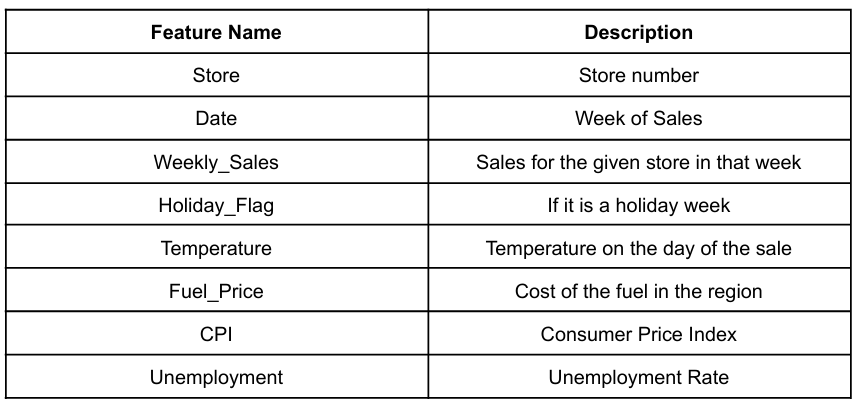

 1. You are provided with the weekly sales data for their various outlets. Use statistical
 analysis, EDA, outlier analysis, and handle the missing values to come up with various
 insights that can give them a clear perspective on the following:
 a. If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most?
 b. If the weekly sales show a seasonal trend, when and what could be the reason?
 c. Does temperature affect the weekly sales in any manner?
 d. How is the Consumer Price index affecting the weekly sales of various stores?
 e. Top performing stores according to the historical data.
 f.
 The worst performing store, and how significant is the difference between the
 highest and lowest performing stores.

 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Importing Wallmart data
data=pd.read_csv('/content/Walmart DataSet.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Let us check for one model then iteratively fitting for five models.

In [ ]:
df_store2=data[data['Store']==2].copy()
df_store2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324


In [ ]:
# Converting Date column in datetime format.
df_store2['Date']=pd.to_datetime(df_store2['Date'],format='%d-%m-%Y')

In [ ]:
# Making Date column as index
df_store2.set_index('Date',inplace=True)

In [ ]:
# Details of the data
df_store2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Weekly_Sales  143 non-null    float64
 2   Holiday_Flag  143 non-null    int64  
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 8.9 KB


In [ ]:
# Checking for null values
df_store2.isnull().sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# Duplicate values
df_store2.duplicated().sum()

np.int64(0)

In [ ]:
ts_store2=df_store2['Weekly_Sales']
ts_store2.head()

,Weekly_Sales
Date,
2010-02-05,2136989.46
2010-02-12,2137809.50
2010-02-19,2124451.54
2010-02-26,1865097.27
2010-03-05,1991013.13


<Axes: xlabel='Date'>

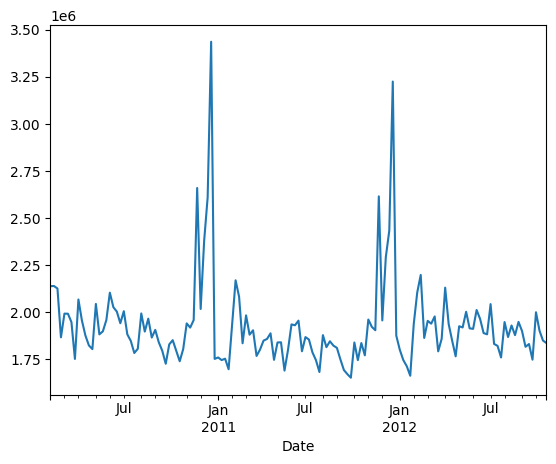

In [ ]:
# Plotting the Weekly Sales over the years.
ts_store2.plot()

Figure(640x480)


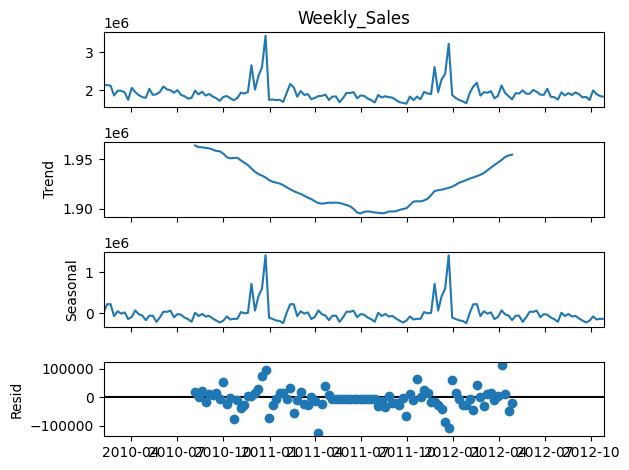

In [ ]:
# Breakdown the data into seasonality, trend and error
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(ts_store2)
print(decomposed.plot())

In [ ]:
# Checking Stationarity of the data
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(ts_store2)
test_result[1]

np.float64(0.003990207089066268)

In [ ]:
if test_result[1]>0.05:
  print('Data is not stationary')
else:
  print('Data is stationary')

Data is stationary


The test gives stationary data but we can observe some patterns and trend in the plots.

In [ ]:
# Apply log transformation (Box-cox lambda=0)
first_log=np.log(ts_store2 + 1)

In [ ]:
# Standard differencing to remove trend
standard_diff=first_log.diff().dropna()

In [ ]:
# Again checking the stationarity of the data
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(standard_diff)
test_result[1]

np.float64(4.3403759193841373e-13)

In [ ]:
if test_result[1] > 0.05:
  print('Data is not Stationary')
else:
  print('Data is Stationary')

Data is Stationary


The coefficient becomes to small. Thus data has almost no trend and seasonality.

<Axes: xlabel='Date'>

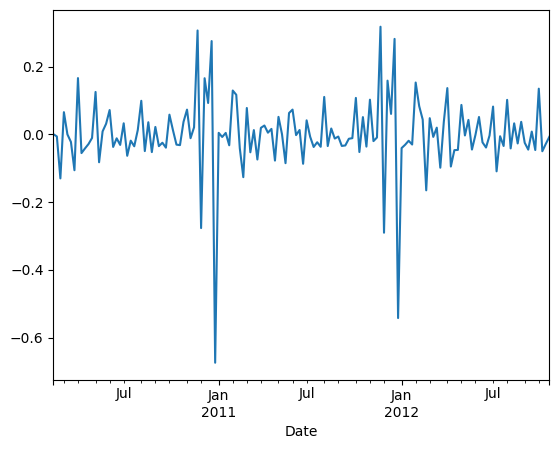

In [ ]:
standard_diff.plot()

Figure(640x480)


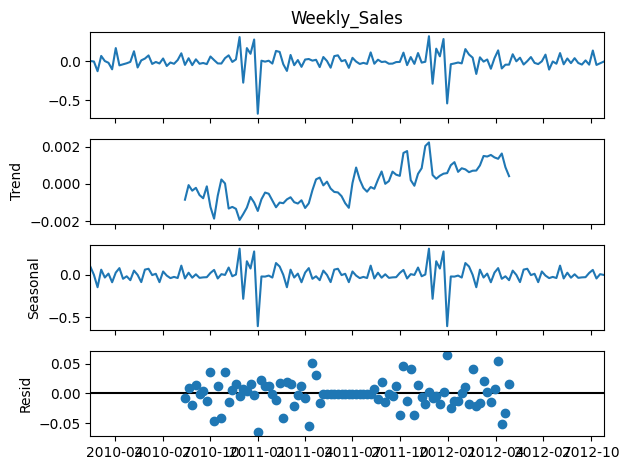

In [ ]:
# Breakdown the data into seasonality, trend and error
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(standard_diff)
print(decomposed.plot())

Now the data is suitable for ARIMA model.

In [ ]:
# Splitting the log transformed series into training and testing
train_size=115
train_log=first_log[:train_size]
test_original=first_log[train_size:]

In [ ]:
#Model Fitting ARIMA(1,1,1)
# d=1 for model to perform standard differencing internally
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(train_log,order=(1,1,1))
arima_result=arima_model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecasting
forecast_log=arima_result.forecast(steps=len(test_original))
forecast_log.head(10)

,predicted_mean
2012-04-20,14.472086
2012-04-27,14.470309
2012-05-04,14.469516
2012-05-11,14.469162
2012-05-18,14.469004
2012-05-25,14.468934
2012-06-01,14.468902
2012-06-08,14.468888
2012-06-15,14.468882
2012-06-22,14.468879


In [ ]:
# Reverse Transformation(log)
forecast_original=np.exp(forecast_log)-1
forecast_original[forecast_original < 0] = 0

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test_original,forecast_original))
print(f'Root Mean squared error for ARIMA(1,1,1) model is ${rmse:,.2f}')

Root Mean squared error for ARIMA(1,1,1) model is $1,922,382.92


An RMSE of 1,922,382.92 dollar for a store whose weekly sales are typically around 1.4 million dollar to 1.8 million dollar is extremely high. This indicates that the $\text{ARIMA}(1, 1, 1)$ model is performing poorly and is likely overfitting or missing a major component of the sales pattern.

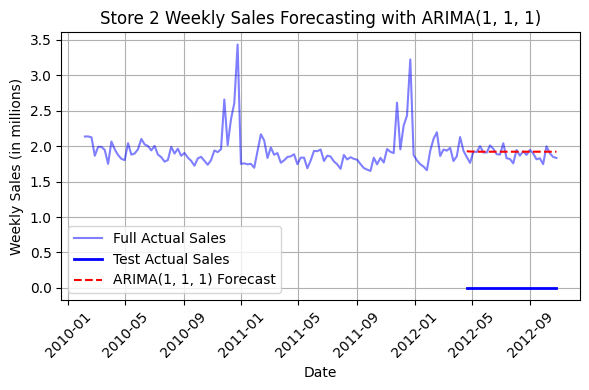

In [ ]:
# Plotting (Plots the original and forecasted sales in millions)
plt.figure(figsize=(6, 4))
plt.plot(ts_store2.index, ts_store2.values / 1e6, label='Full Actual Sales', color='blue', alpha=0.5)
plt.plot(test_original.index, test_original.values / 1e6, label='Test Actual Sales', color='blue', linewidth=2)
plt.plot(forecast_original.index, forecast_original.values / 1e6, label='ARIMA(1, 1, 1) Forecast', color='red', linestyle='--')
plt.title(f'Store 2 Weekly Sales Forecasting with ARIMA(1, 1, 1)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (in millions)')
plt.legend(loc='lower left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

So the model is not focusing on seasonality and effect of exogenous(external) variables such as 'temperature','Holiday Flag','Fuel Price'. Let us evaluating the new model SARIMAX (Seasonal ARIMA).

In [ ]:
# Select all external variables (exogenous factors) for SARIMAX
ext_factors=df_store2[['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]

In [ ]:
# Split the external variables to match the time series split
ext_train=ext_factors[:train_size]
ext_test=ext_factors[train_size:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 3. Model Fitting: SARIMAX(1, 1, 1)x(1, 0, 0)_52 with ALL Factors
# Order=(p=1, d=1, q=1), Seasonal Order=(P=1, D=0, Q=0, S=52)
sarimax_model_full = SARIMAX(train_log, exog=ext_train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 52))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
sarimax_result=sarimax_model_full.fit(disp=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast_log=sarimax_result.forecast(steps=len(test_original),exog=ext_test)

In [ ]:
# Reverse Transformation
forecast_original = np.exp(forecast_log) - 1
forecast_original[forecast_original < 0] = 0

In [ ]:
# Evaluation
rmse_sarimax_full = np.sqrt(mean_squared_error(test_original, forecast_original))

In [ ]:
# Model Evaluation
print(f"Final Model RMSE: ${rmse_sarimax_full:,.2f}")
print("\n--- Final Model Summary (Coefficients) ---")
print(sarimax_result.summary().tables[1])

Final Model RMSE: $1,936,273.46

--- Final Model Summary (Coefficients) ---
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag     0.0302      0.036      0.831      0.406      -0.041       0.102
Temperature      0.0003      0.001      0.445      0.656      -0.001       0.002
Fuel_Price      -0.0064      0.040     -0.160      0.873      -0.085       0.072
CPI             -0.0080      0.006     -1.312      0.189      -0.020       0.004
Unemployment    -0.1198      0.066     -1.802      0.072      -0.250       0.010
ar.L1            0.0846      0.115      0.735      0.463      -0.141       0.310
ma.L1           -0.8193      0.053    -15.426      0.000      -0.923      -0.715
ar.S.L52         0.9442      0.011     86.128      0.000       0.923       0.966
sigma2           0.0015      0.000      6.326      0.000       0.001       0.002


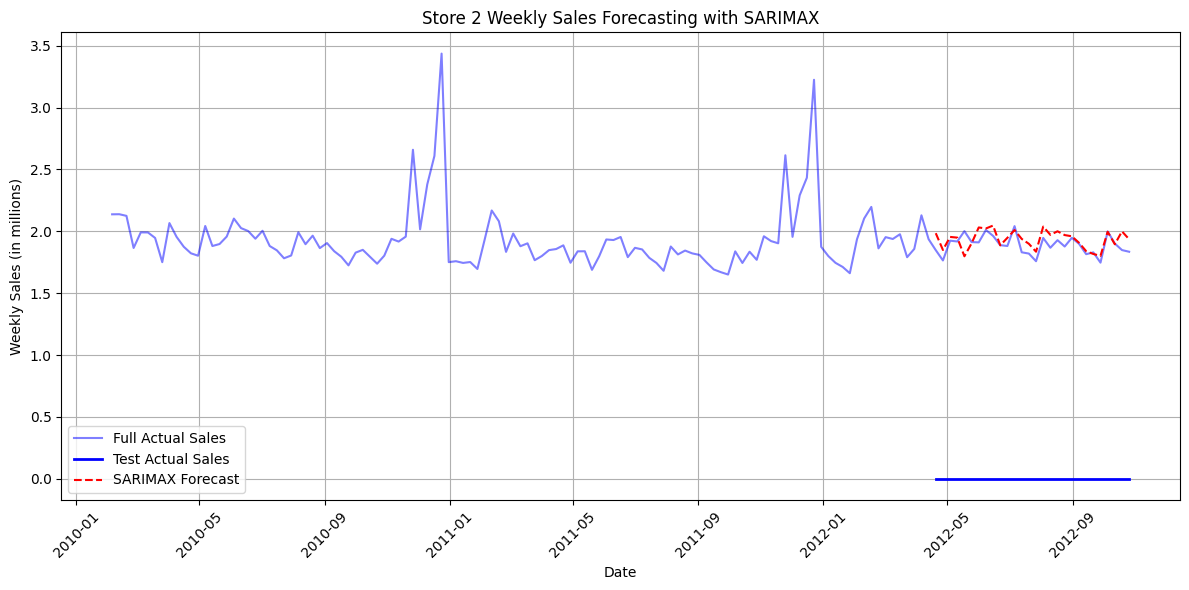

In [ ]:
# Plotting the forecast is highly recommended for visualization
plt.figure(figsize=(12, 6))
plt.plot(ts_store2.index, ts_store2.values / 1e6, label='Full Actual Sales', color='blue', alpha=0.5)
plt.plot(test_original.index, test_original.values / 1e6, label='Test Actual Sales', color='blue', linewidth=2)
plt.plot(forecast_original.index, forecast_original.values / 1e6, label='SARIMAX Forecast', color='red', linestyle='--')
plt.title(f'Store 2 Weekly Sales Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (in millions)')
plt.legend(loc='lower left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**----------------------------------------------------------**

## ** Predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

**Let us predict the sales for five stores for the next 12 weeks.**

Store 20: Highest Performing

Store 4: High Performing

Store 2: Medium-high performing

Store 33: Low Performing

Store 45: Worst Performing

In [ ]:
store_list = [20, 4, 2, 33, 45]
FORECAST_PERIOD = 12

In [ ]:
# Define the 12 future dates after the last date in the dataset
last_date = data.index.max()
future_dates = pd.date_range(start=last_date, periods=FORECAST_PERIOD + 1, freq='W-FRI')[1:]

In [ ]:
# DataFrame to store all 5-store forecasts
all_store_forecasts = pd.DataFrame(index=future_dates)

In [ ]:
# Iterate Through Stores and Forecast
print(f"Starting SARIMAX forecast for stores: {store_list}")

Starting SARIMAX forecast for stores: [20, 4, 2, 33, 45]


In [ ]:
for store_id in store_list:
    df_store = data[data['Store'] == store_id].copy()

    # Prepare Time Series (y) and Exogenous Variables (X)
    ts_store = df_store['Weekly_Sales']
    first_log = np.log(ts_store + 1)

    # Full historical exogenous data (X_train)
    exog_full = df_store[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

    # ASSUMPTION FOR FUTURE X (Crucial for SARIMAX)
    # The simplest assumption is that the last 12 known values will persist.
    exog_future = exog_full.iloc[-FORECAST_PERIOD:]

    # SARIMAX model fitting
    sarimax_model = SARIMAX(
        first_log,
        exog=exog_full, # All historical X data
        order=(1, 1, 1),
        seasonal_order=(1, 0, 0, 52)
    )
    # Use disp=False to suppress iteration messages
    try:
        sarimax_result = sarimax_model.fit(disp=False)
    except Exception as e:
        print(f"Warning: SARIMAX failed to converge for Store {store_id}. Skipping. Error: {e}")
        continue

    # Forecast the next 12 weeks
    # Use the prepared exog_future data for the forecasting period
    forecast_log = sarimax_result.forecast(steps=FORECAST_PERIOD, exog=exog_future)

    # Reverse Transformation
    forecast_original = np.exp(forecast_log) - 1
    forecast_original[forecast_original < 0] = 0

    # Store the result
    all_store_forecasts[f'Store {store_id} Forecast'] = forecast_original.values
    print(f"Successfully forecasted sales for Store {store_id}.")

print("\n--- Final 12-Week Forecast ---")
print(all_store_forecasts)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_

Successfully forecasted sales for Store 20.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq

Successfully forecasted sales for Store 4.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq

Successfully forecasted sales for Store 2.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq

Successfully forecasted sales for Store 33.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Successfully forecasted sales for Store 45.

--- Final 12-Week Forecast ---
                               Store 20 Forecast  Store 4 Forecast  \
1970-01-09 00:00:00.000006434       2.213388e+06      2.290241e+06   
1970-01-16 00:00:00.000006434       2.222438e+06      2.224281e+06   
1970-01-23 00:00:00.000006434       2.151489e+06      2.259954e+06   
1970-01-30 00:00:00.000006434       2.642324e+06      2.702003e+06   
1970-02-06 00:00:00.000006434       2.273014e+06      2.441073e+06   
1970-02-13 00:00:00.000006434       2.423996e+06      2.513748e+06   
1970-02-20 00:00:00.000006434       2.580008e+06      2.746920e+06   
1970-02-27 00:00:00.000006434       3.148074e+06      3.539052e+06   
1970-03-06 00:00:00.000006434       2.013106e+06      1.882926e+06   
1970-03-13 00:00:00.000006434       2.004224e+06      2.079260e+06   
1970-03-20 00:00:00.000006434       1.956442e+06      1.983618e+06   
1970-03-27 00:00:00.000006434       1.927820e+06      2.035718e+06   

             

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**----------------------------------------------------------**

 a. If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most?

In [ ]:
# Using SARIMAX model fitted for store 2
#H0: There is no significant effect of unemployment rate on Weekly Sales.
#H1: There is a significant effect of unemployment rate on Weekly Sales.

p_value=0.072

if p_value > 0.05:
  print('There is no significant effect of unemployment rate on Weekly Sales')
else:
  print('There is a significant effect of unemployment rate on Weekly Sales')

There is no significant effect of unemployment rate on Weekly Sales


 b. If the weekly sales show a seasonal trend, when and what could be the reason?

 Yes, Weekly Sales showing a seasonal trend. The sales peak heavily during a last quarter of the year.

 It is due to US holidays like Thanksgiving, Black Friday, and Christmas.

 c. Does temperature affect the weekly sales in any manner?

In [ ]:
# Using SARIMAX model fitted for store 2
#H0: There is no significant effect of Temperature on Weekly Sales.
#H1: There is a significant effect of Temperature on Weekly Sales.

p_value=0.656

if p_value > 0.05:
  print('There is no significant effect of Temperature on Weekly Sales')
else:
  print('There is a significant effect of Temperature on Weekly Sales')

There is no significant effect of Temperature on Weekly Sales


d. How is the Consumer Price index affecting the weekly sales of various stores?

In [ ]:
# Using SARIMAX model fitted for store 2
#H0: There is no significant effect of Consumer Price index on Weekly Sales.
#H1: There is a significant effect of Consumer Price index on Weekly Sales.

p_value=0.189

if p_value > 0.05:
  print('There is no significant effect of Consumer Price index on Weekly Sales')
else:
  print('There is a significant effect of Consumer Price index on Weekly Sales')

There is no significant effect of Consumer Price index on Weekly Sales


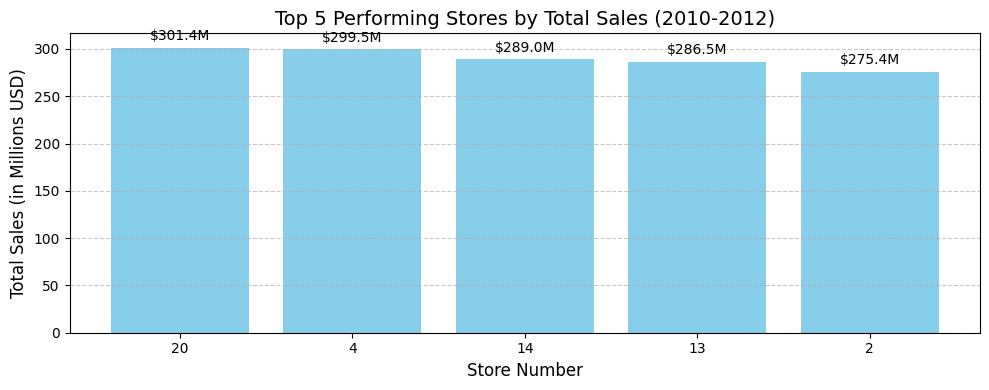

In [ ]:
# Load the data
df = pd.read_csv('Walmart DataSet.csv')
#Calculate total sales for all 45 stores
store_performance = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

#Get the top 5 stores
top_5_stores = store_performance.head(5).reset_index()
top_5_stores.columns = ['Store', 'Total_Sales']

# Create the visualization (Bar Chart)
plt.figure(figsize=(10, 4))
bars = plt.bar(top_5_stores['Store'].astype(str), top_5_stores['Total_Sales'] / 1e6, color='skyblue')

# Add labels and title
plt.title('Top 5 Performing Stores by Total Sales (2010-2012)', fontsize=14)
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales (in Millions USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the sales value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, f'${yval:.1f}M', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

 f.
 The worst performing store, and how significant is the difference between the
 highest and lowest performing stores.

In [ ]:
# Calculate total sales for all 45 stores
store_performance = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Get the sales for the highest and lowest performing stores
sales_highest = store_performance.iloc[0] # Store 20
sales_lowest = store_performance.iloc[-1] # Store 33

# Calculate the percentage difference
difference_ratio = (sales_highest - sales_lowest) / sales_lowest * 100

print(f"The percentage difference is: {difference_ratio:,.2f}%")
print(sales_lowest)

The percentage difference is: 711.08%
37160221.96


Worst Performing Store: Store No.33

Significance of Difference: The highest performing store (Store 20) sold $711.08\%$ more than the worst performing store (Store 33).

**----------------------------------------------------------**